<a href="https://colab.research.google.com/github/AsmaaIbrahiim/Face-Mask-Detection/blob/model_1/For_Testing_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Trained Model

In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#https://drive.google.com/file/d/1eaLAU7Hul-TVxgpOE-aj9rYQgC-gh4xc/view?usp=sharing
file_id_1 = '1eaLAU7Hul-TVxgpOE-aj9rYQgC-gh4xc'
downloaded = drive.CreateFile({'id': file_id_1})
downloaded.GetContentFile('vgg16.h5')

In [2]:
import tensorflow as tf
from tensorflow import keras
vgg16_model = keras.models.load_model('/content/vgg16.h5')

## Importing Dataset to test on 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:01<00:00, 82.9MB/s]
100% 163M/163M [00:01<00:00, 90.2MB/s]


In [10]:
!unzip -qq \*.zip  && rm *.zip 

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [17]:
import os
import random 
from glob import glob
from pathlib import Path
TEST_DIR = os.path.join("/content", "data")

all_data = [y for x in os.walk(TEST_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
print(len(all_data))
all_data[:10]
classes = ['masked','non_masked']

7553


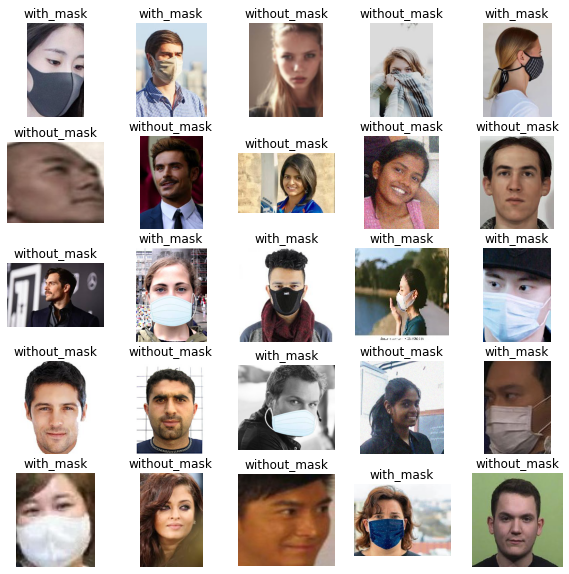

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

In [15]:
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 500
HEIGHT = 128
WIDTH = 128
test_datagen =  ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(HEIGHT, WIDTH),
                                                  batch_size=BATCH_SIZE,
                                                  shuffle = False,
                                                  color_mode='rgb')

Found 7553 images belonging to 2 classes.


## Testing The Model

In [16]:
vgg16_model.evaluate(test_generator, batch_size=500, steps=15)

 4/15 [=======>......................] - ETA: 8s - loss: 1.4166 - accuracy: 0.9800

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/15 [==============================] - 66s 1s/step - loss: 12.5683 - accuracy: 0.8956


[12.56828498840332, 0.8956000208854675]

In [26]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

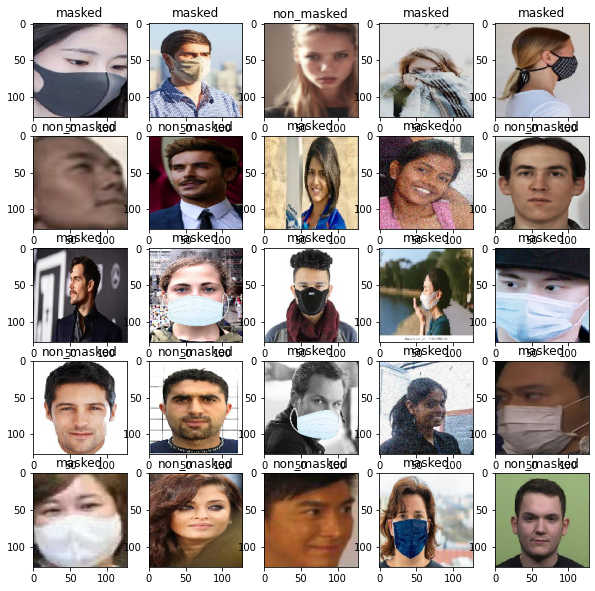

In [31]:
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = load_img(images[i],target_size = (HEIGHT,WIDTH)) # Read image from disk
    #plt.imshow(image)
    #plt.title(classes[int(np.argmax(vgg16_model.predict(np.expand_dims(image,axis=0))))])
    #plt.axis('off')
    plt.imshow(image)

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    plt.title(classes[np.argmax(vgg16_model.predict(image))])
plt.show()